In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [18]:
file = "./data/9June2017to23June2019_geometry_Mask.xlsx"
file = "./data/Apr2017toFeb2018.csv"
# file = "./data/23June2019_coherent.xlsx"
# data = pd.read_excel(file)
data = pd.read_csv(file, sep='\t')
data = data.dropna()
data.head()

,Pixel-X,Pixel-Y,Longitude,Latitude,displacement_VV,coh_IW2_VV_16Apr2017_10Feb2018_slv2_16Apr2017
0,568.5,541.5,3.030468,6.848202,-0.020479,0.196825
1,569.5,541.5,3.030732,6.848202,-0.020508,0.231884
2,570.5,541.5,3.030996,6.848202,-0.017777,0.229253
3,571.5,541.5,3.031261,6.848202,-0.008377,0.222196
4,564.5,542.5,3.029410,6.847937,-0.021434,0.058827


In [19]:
print(data.shape)
# data1 = data[data["coh_IW3_VV_09Jun2017_23Jun2019_slv2_09Jun2017"] > 0.09]
data1 = data
# data1 = data1.drop(columns=["i_ifg_VV_09Jun2017_23Jun2019_slv1_09Jun2017", 
#                             "q_ifg_VV_09Jun2017_23Jun2019_slv1_09Jun2017", 
#                             "coh_IW3_VV_09Jun2017_23Jun2019_slv2_09Jun2017"])
data1.shape

(5586010, 6)


(5586010, 6)

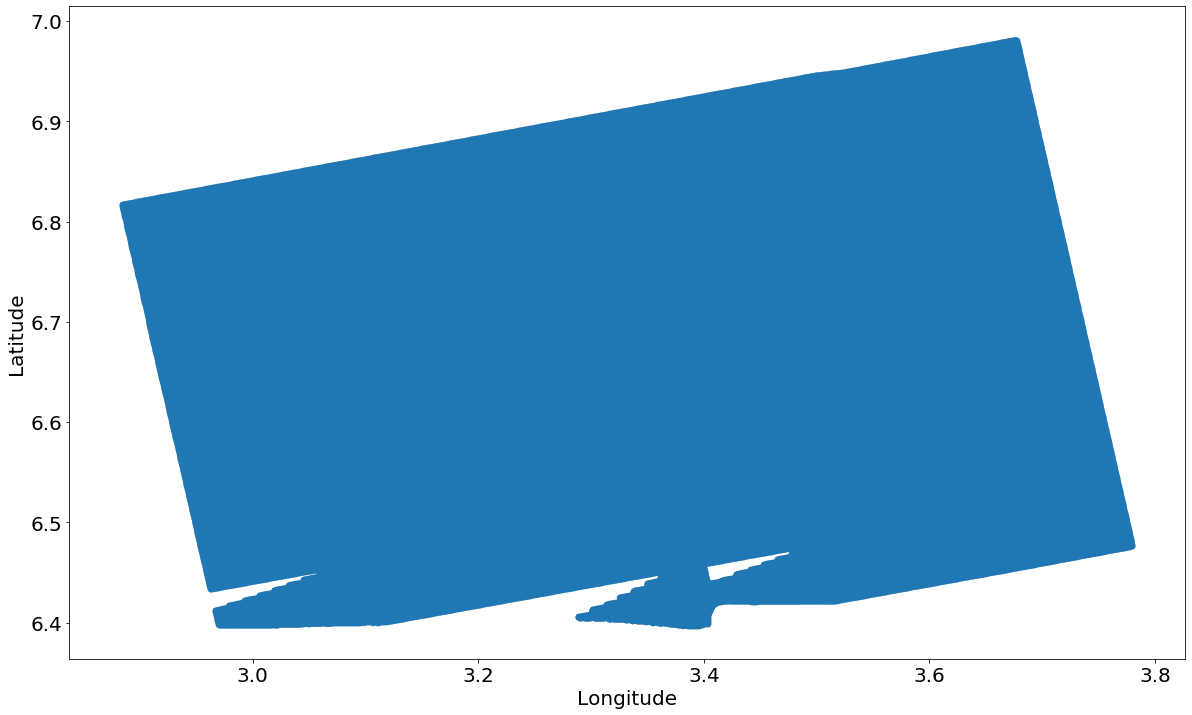

In [20]:
X = data.iloc[:, 2:5]

data1.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rc('font', size=20)  
plt.rc('axes', labelsize=20)
plt.rcParams["figure.figsize"] = fig_size
# plt.scatter(data.iloc[:, 2], data.iloc[:, 3], s = 50, c = 'b')
# plt.rc('font', size=SMALL_SIZE)  
plt.show()

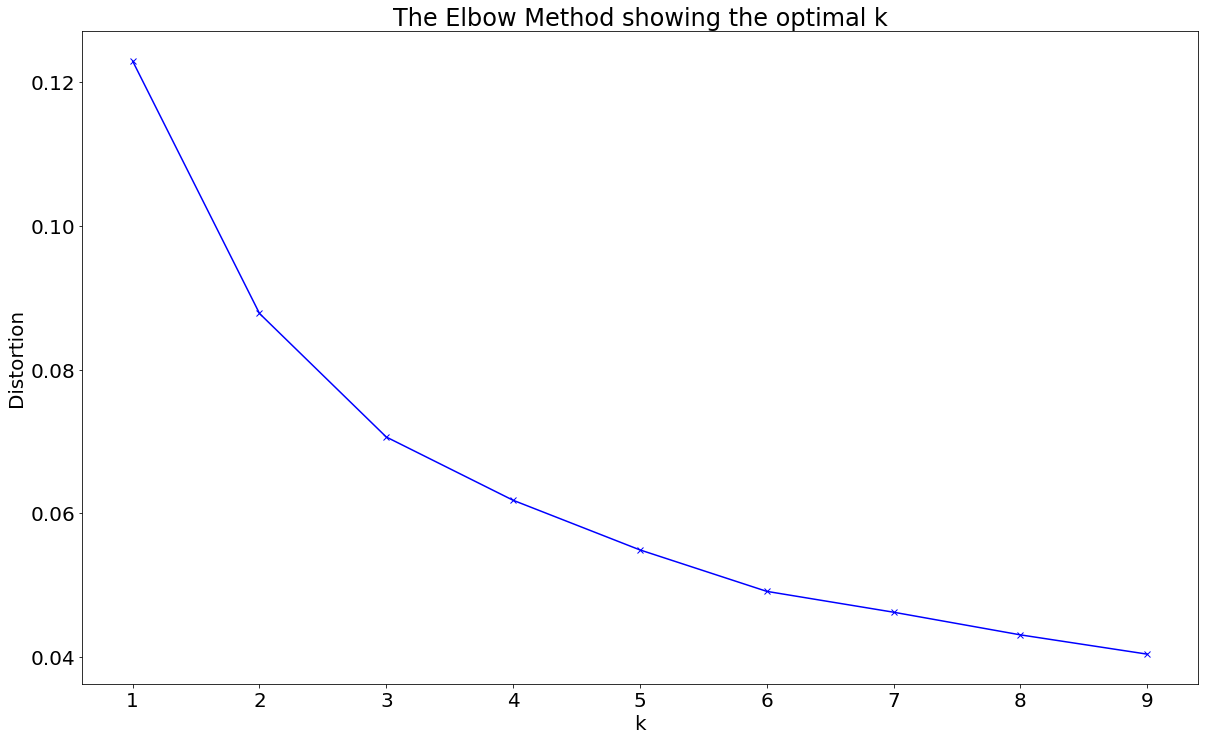

In [9]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.rc('font', size=20)  
plt.rc('axes', labelsize=20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


    

In [21]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
Kmean.cluster_centers_

array([[ 3.58573113e+00,  6.57390149e+00, -1.85549525e-02],
       [ 3.07811863e+00,  6.72827701e+00, -2.58863655e-03],
       [ 3.48976749e+00,  6.81720641e+00, -9.70098314e-03],
       [ 3.20762902e+00,  6.52970410e+00, -6.64566179e-03]])

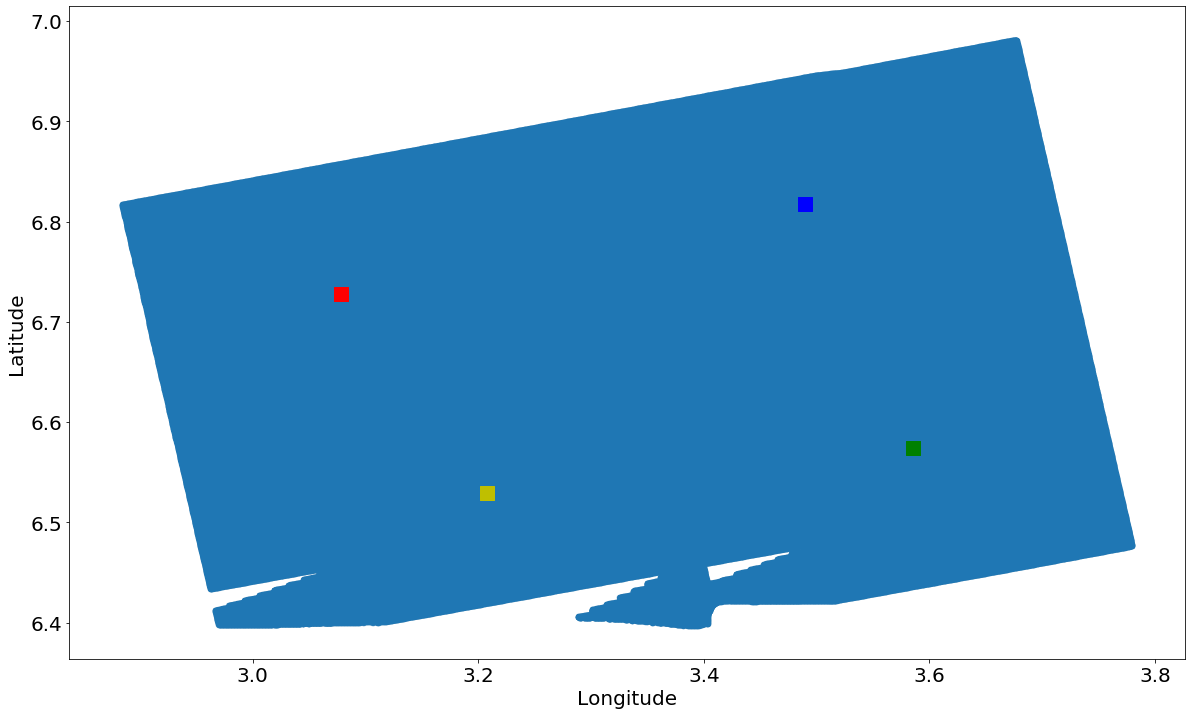

In [23]:
data1.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.scatter(3.58573113e+00,  6.57390149e+00, s=200, c='g', marker='s')
plt.scatter(3.07811863e+00,  6.72827701e+00, s=200, c='r', marker='s')
plt.scatter(3.48976749e+00,  6.81720641e+00, s=200, c='b', marker='s')
plt.scatter(3.20762902e+00,  6.52970410e+00, s=200, c='y', marker='s')

plt.rc('font', size=20)  
plt.rc('axes', labelsize=20)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [24]:
# Kmean.labels_
clusterCol = pd.Series(Kmean.labels_)
# print(clusterCol)
data1 = data1.assign(Class=clusterCol)

In [82]:
data1.head()
# data.to_csv("test.csv")

,Pixel-X,Pixel-Y,Longitude,Latitude,displacement,i_ifg_VV_09Jun2017_23Jun2019_slv1_09Jun2017,q_ifg_VV_09Jun2017_23Jun2019_slv1_09Jun2017,coh_IW3_VV_09Jun2017_23Jun2019_slv2_09Jun2017,Class
1,18.5,18.5,-99.509517,18.950296,-0.011503,-3609442910000,2141288400000,0.350919,0.0
2,19.5,18.5,-99.509257,18.950342,-0.010257,-3212652840000,3427370800000,0.397340,0.0
3,20.5,18.5,-99.508998,18.950389,-0.009947,-6969676000000,8568242200000,0.349106,0.0
8,25.5,18.5,-99.507701,18.950621,0.005345,7536152400000,-20033214300000,0.325573,0.0
9,26.5,18.5,-99.507442,18.950667,-0.001616,6124845700000,2348111630000,0.334292,0.0


In [25]:
df0 = data1[data1["Class"] == 0]
df1 = data1[data1["Class"] == 1]
df2 = data1[data1["Class"] == 2]
df3 = data1[data1["Class"] == 3]

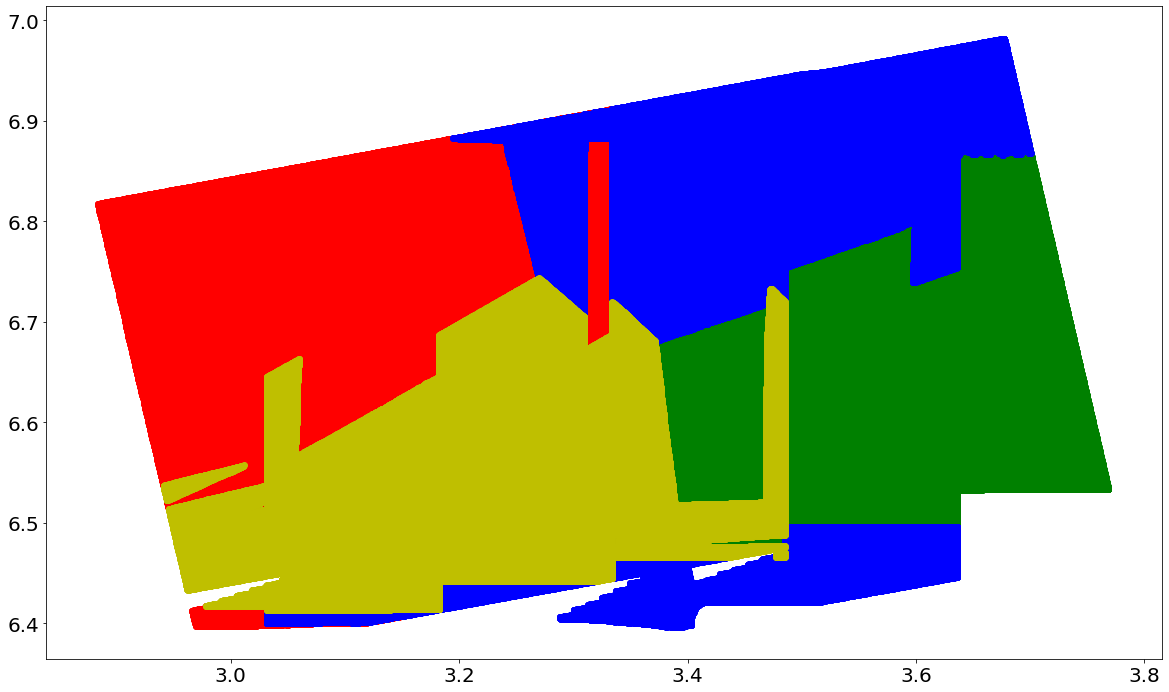

In [26]:
# data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.scatter(df0["Longitude"], df0["Latitude"], c='g')
plt.scatter(df1["Longitude"], df1["Latitude"], c='r')
plt.scatter(df2["Longitude"], df2["Latitude"], c='b')
plt.scatter(df3["Longitude"], df3["Latitude"], c='y')
# plt.scatter(-9.91627870e+01, 1.93151747e+01, s=200, c='g', marker='s')
# plt.scatter(-9.92219462e+01, 1.94303847e+01, s=200, c='r', marker='s')
# plt.scatter(-9.92010732e+01, 1.95480982e+01, s=200, c='b', marker='s')
# plt.scatter(-9.91146934e+01, 1.94155427e+01, s=200, c='y', marker='s')
plt.rc('font', size=20)  
plt.rc('axes', labelsize=20)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()